In [3]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
x = torch.tensor([1.0])

In [5]:
from sklearn.datasets import load_iris

#Load iris dataset
iris = load_iris()

#Extract the features and target variables

X = iris.data
y = iris.target
print(type(X))

#print(X)

<class 'numpy.ndarray'>


<span style="font-size:22px;">***- Splitting Data into Training and Testing***.</span>

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#random_state=42 guarantees the split will be always the same
#stratify=y maintains proportion of labels for train and test data
display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

'X_train shape: (120, 4)'

'y_train shape: (120,)'

'X_test shape: (30, 4)'

'y_test shape: (30,)'

<span style="font-size:22px;">***- Normalizing Data***.</span>

In [7]:
# Standardize the data
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

<span style="font-size:22px;">***- Converting from Numpy to Tensors***.</span>

In [8]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

<span style="font-size:22px;">***- Create Data Loader for Training and Test Sets***.</span>

In [10]:
from torch.utils.data import DataLoader, TensorDataset

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

<span style="font-size:22px;">***- Build the Neural Network Model.***.</span>

In [32]:
import torch.nn as nn

class ClassificationNet(nn.Module):
    def __init__(self, input_units, hidden_units, output_units):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = ClassificationNet(input_units=4, hidden_units=64, output_units=3)

In [33]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
import matplotlib.pyplot as plt

In [35]:
def new_training(epochs):
    """This function trains the newly created model"""
    train_loss = []
    test_loss = []
    for epoch in range(epochs):
        #Training Phase
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            #print(y_batch)
            model_output = model(X_batch)
            #print(model_output)
            loss = criterion(model_output, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        running_loss /= len(train_loader)
        train_loss.append(running_loss)

        #Evaluation Phase
        model.eval()
        running_test_loss = 0.0
        for X_batch, y_batch in test_loader:
            test_output = model(X_batch)
            loss = criterion(test_output, y_batch)
            running_test_loss += loss.item()
        running_test_loss /= len(test_loader)
        test_loss.append(running_test_loss)

    # Plot the loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
    plt.plot(range(1, epochs + 1), test_loss, label='Test Loss', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss Curve SGS')
    plt.legend()
    plt.grid(True)
    plt.show()

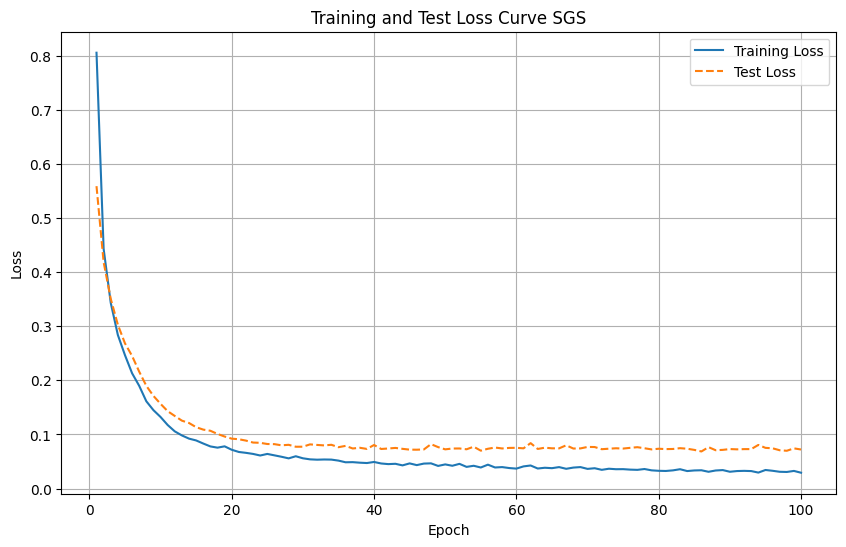

In [36]:
new_training(100)

In [37]:
import numpy as np

for iter in range(len(y_test)):
    model.eval()

    result = model(X_test[iter, :])
    

    prediction = np.argmax(result.detach().numpy(), axis=None)
    

    print("The actual value is: ", y_test[iter].numpy(), "| Model: ", prediction)

The actual value is:  0 | Model:  0
The actual value is:  2 | Model:  2
The actual value is:  1 | Model:  1
The actual value is:  1 | Model:  1
The actual value is:  0 | Model:  0
The actual value is:  1 | Model:  1
The actual value is:  0 | Model:  0
The actual value is:  0 | Model:  0
The actual value is:  2 | Model:  2
The actual value is:  1 | Model:  1
The actual value is:  2 | Model:  2
The actual value is:  2 | Model:  2
The actual value is:  2 | Model:  2
The actual value is:  1 | Model:  1
The actual value is:  0 | Model:  0
The actual value is:  0 | Model:  0
The actual value is:  0 | Model:  0
The actual value is:  1 | Model:  1
The actual value is:  1 | Model:  1
The actual value is:  2 | Model:  2
The actual value is:  0 | Model:  0
The actual value is:  2 | Model:  2
The actual value is:  1 | Model:  1
The actual value is:  2 | Model:  2
The actual value is:  2 | Model:  2
The actual value is:  1 | Model:  2
The actual value is:  1 | Model:  1
The actual value is:  0 | Mo